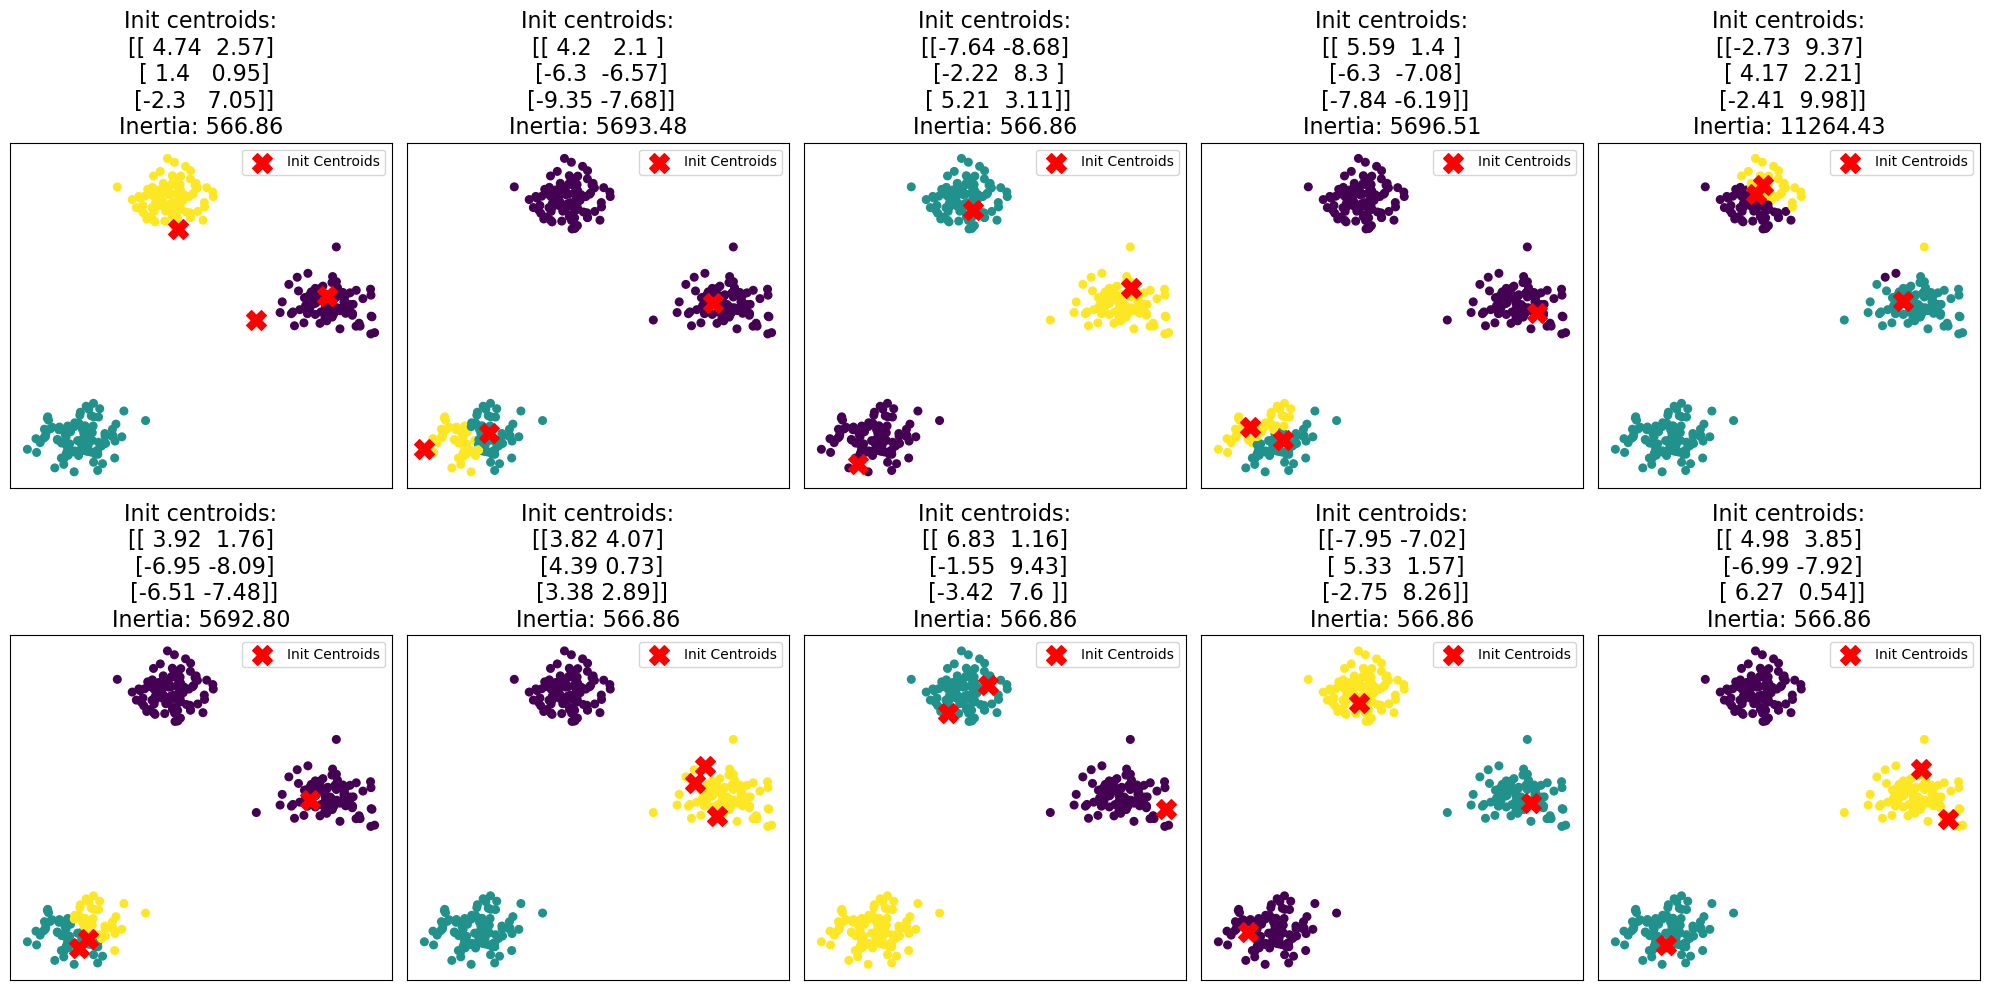

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)


fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i in range(10):
    rng = np.random.RandomState(i)
    init_centroids = X[rng.choice(X.shape[0], 3, replace=False)]
    
    kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    ax.scatter(init_centroids[:, 0], init_centroids[:, 1], c='red', marker='X', s=200, label='Init Centroids')
    ax.set_title(f"Init centroids:\n{np.round(init_centroids, 2)}\nInertia: {inertia:.2f}", fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

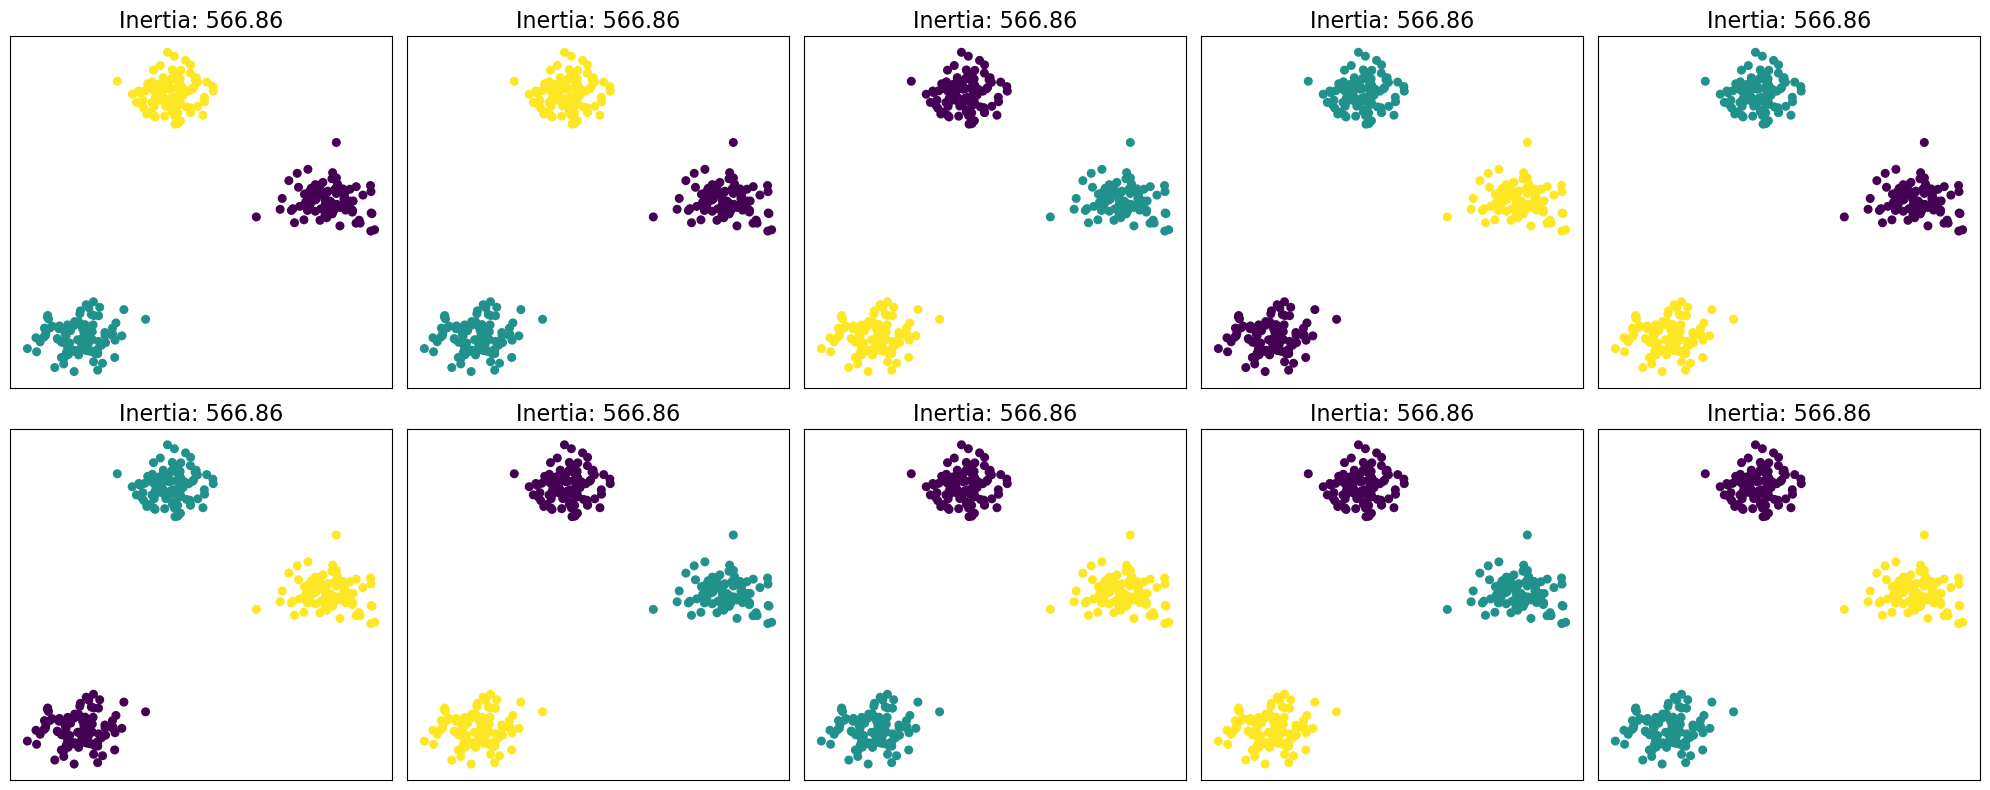

In [6]:
from gka import fit

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i in range(10):
    rng = np.random.RandomState(i)
    population, history = fit(X, 2, 300, 3)
    labels = population[np.argmax(history[-1])]         # best individual at final generations
    inertia = -(history[-1][np.argmax(history[-1])])     # inertia of the best individual at final generations
    
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    ax.set_title(f"Inertia: {inertia:.2f}", fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

